<a href="https://colab.research.google.com/github/samuelpsouza/distributed-computing/blob/main/lab05/lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Importing Dada MNIST

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Ploting data

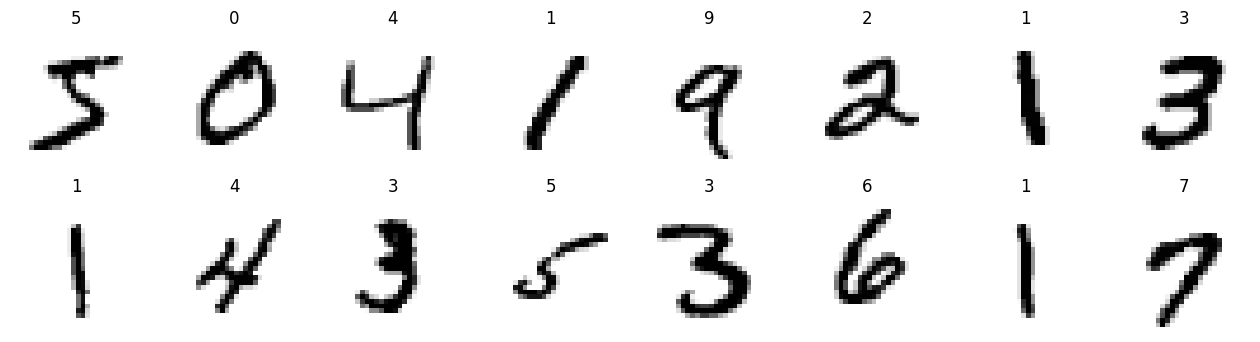

In [ ]:
rows    = 2
columns = 8

fig, axs = plt.subplots(rows, columns, figsize=(16, 4))
axs      = axs.flatten()

for i in range(rows * columns):
  axs[i].imshow(x_train[i], cmap='gray_r')
  axs[i].set_title(str(y_train[i]))
  axs[i].axis('off')

plt.show()

### Normalizing the Data

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Defining the Model

In [ ]:
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the Model

In [ ]:
model_1.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Training the Model

In [ ]:
history_model_1 = model_1.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=64
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6330 - loss: 1.3902 - val_accuracy: 0.8627 - val_loss: 0.6064
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8610 - loss: 0.5850 - val_accuracy: 0.8802 - val_loss: 0.4798
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8753 - loss: 0.4879 - val_accuracy: 0.8890 - val_loss: 0.4285
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8841 - loss: 0.4416 - val_accuracy: 0.8951 - val_loss: 0.3995
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8885 - loss: 0.4121 - val_accuracy: 0.8983 - val_loss: 0.3803
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8940 - loss: 0.3945 - val_accuracy: 0.9013 - val_loss: 0.3660
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8955 - loss: 0.3823 - val_accuracy: 0.9042 - val_loss: 0.3557
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8981 - loss: 0.3706 - val_accuracy: 0.9053 - val_

### Ploting Results

In [ ]:
def plot_model_results(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o', color='blue')
  ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Training Loss', marker='o', color='blue')
  ax[1].plot(history.history['val_loss'], label='Validation Loss', marker='o', color='red', linestyle='--')

  for _ in range(2):
    ax[_].set_xlabel('Epoch')
    ax[_].set_ylabel('Accuracy' if _ == 0 else 'Loss')
    ax[_].legend()
    ax[_].grid(True, linestyle=':')

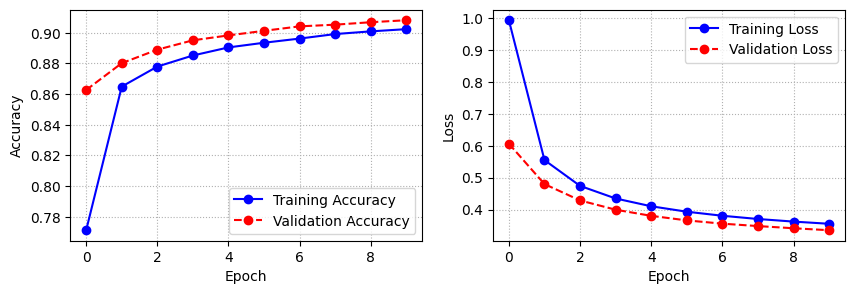

In [ ]:
plot_model_results(history_model_1)

### Add more layers

In [ ]:
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(200, activation='sigmoid'),
        tf.keras.layers.Dense(60, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model_2.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history_model_2 = model_2.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=64,
    verbose=2
)

Epoch 1/10
938/938 - 6s - 6ms/step - accuracy: 0.2573 - loss: 2.2535 - val_accuracy: 0.4472 - val_loss: 2.1873
Epoch 2/10
938/938 - 11s - 11ms/step - accuracy: 0.5142 - loss: 2.0988 - val_accuracy: 0.5578 - val_loss: 1.9784
Epoch 3/10
938/938 - 10s - 11ms/step - accuracy: 0.5976 - loss: 1.8142 - val_accuracy: 0.6376 - val_loss: 1.6162
Epoch 4/10
938/938 - 4s - 5ms/step - accuracy: 0.6888 - loss: 1.4382 - val_accuracy: 0.7247 - val_loss: 1.2536
Epoch 5/10
938/938 - 5s - 6ms/step - accuracy: 0.7556 - loss: 1.1280 - val_accuracy: 0.7782 - val_loss: 0.9958
Epoch 6/10
938/938 - 7s - 7ms/step - accuracy: 0.7962 - loss: 0.9169 - val_accuracy: 0.8108 - val_loss: 0.8246
Epoch 7/10
938/938 - 9s - 10ms/step - accuracy: 0.8214 - loss: 0.7760 - val_accuracy: 0.8279 - val_loss: 0.7093
Epoch 8/10
938/938 - 8s - 9ms/step - accuracy: 0.8370 - loss: 0.6796 - val_accuracy: 0.8466 - val_loss: 0.6281
Epoch 9/10
938/938 - 6s - 7ms/step - accuracy: 0.8493 - loss: 0.6116 - val_accuracy: 0.8593 - val_loss: 0.5

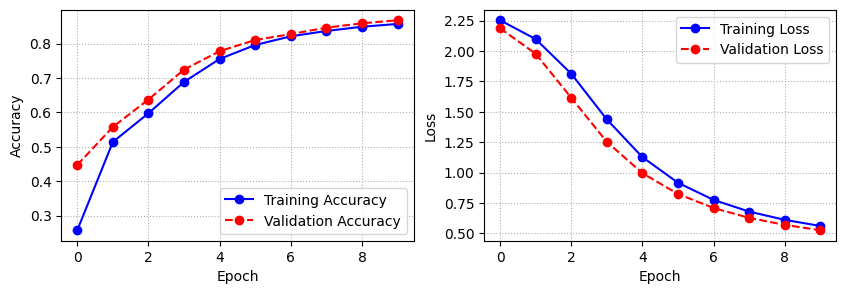

In [ ]:
plot_model_results(history_model_2)

### Activation ReLu

In [ ]:
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(60, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model_3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history_model_3 = model_3.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=64,
    verbose=2
)

Epoch 1/10
938/938 - 9s - 10ms/step - accuracy: 0.9258 - loss: 0.2583 - val_accuracy: 0.9587 - val_loss: 0.1328
Epoch 2/10
938/938 - 5s - 6ms/step - accuracy: 0.9693 - loss: 0.1008 - val_accuracy: 0.9702 - val_loss: 0.0961
Epoch 3/10
938/938 - 7s - 7ms/step - accuracy: 0.9787 - loss: 0.0679 - val_accuracy: 0.9696 - val_loss: 0.0902
Epoch 4/10
938/938 - 6s - 7ms/step - accuracy: 0.9837 - loss: 0.0502 - val_accuracy: 0.9756 - val_loss: 0.0787
Epoch 5/10
938/938 - 8s - 8ms/step - accuracy: 0.9883 - loss: 0.0380 - val_accuracy: 0.9783 - val_loss: 0.0704
Epoch 6/10
938/938 - 10s - 11ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9758 - val_loss: 0.0820
Epoch 7/10
938/938 - 9s - 9ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9758 - val_loss: 0.0859
Epoch 8/10
938/938 - 7s - 8ms/step - accuracy: 0.9933 - loss: 0.0200 - val_accuracy: 0.9780 - val_loss: 0.0768
Epoch 9/10
938/938 - 7s - 8ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.9774 - val_loss: 0.090

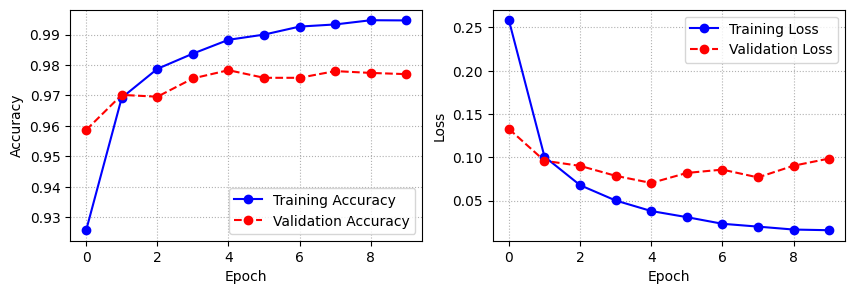

In [ ]:
plot_model_results(history_model_3)

## CNN

In [ ]:
import math

model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
        tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
# lr decay function

def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

In [ ]:
model_4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_model_4 = model_4.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[lr_decay_callback],
    batch_size=64,
    verbose=2
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 89s - 95ms/step - accuracy: 0.9547 - loss: 0.1485 - val_accuracy: 0.9754 - val_loss: 0.0832 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 73s - 77ms/step - accuracy: 0.9839 - loss: 0.0559 - val_accuracy: 0.9831 - val_loss: 0.0557 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 81s - 86ms/step - accuracy: 0.9911 - loss: 0.0294 - val_accuracy: 0.9865 - val_loss: 0.0456 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 84s - 89ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.9881 - val_loss: 0.0483 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 80s - 86ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accurac

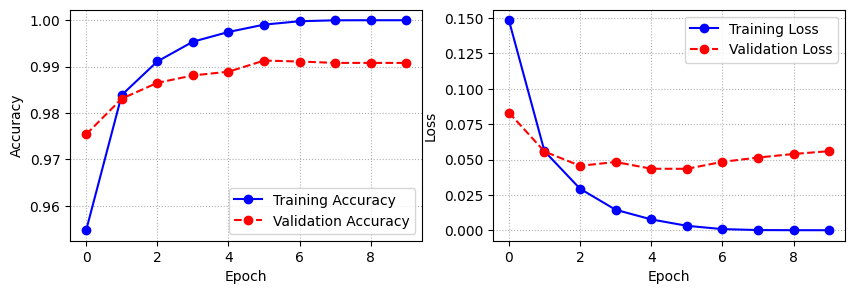

In [ ]:
plot_model_results(history_model_4)

### Using Dropout

In [ ]:
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
        tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model_5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_model_5 = model_5.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[lr_decay_callback],
    batch_size=64,
    verbose=2
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 74s - 79ms/step - accuracy: 0.9439 - loss: 0.1882 - val_accuracy: 0.9671 - val_loss: 0.1013 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 82s - 88ms/step - accuracy: 0.9761 - loss: 0.0846 - val_accuracy: 0.9839 - val_loss: 0.0494 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 82s - 88ms/step - accuracy: 0.9852 - loss: 0.0504 - val_accuracy: 0.9861 - val_loss: 0.0495 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 91s - 98ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9892 - val_loss: 0.0351 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 132s - 140ms/step - accuracy: 0.9940 - loss: 0.0182 - val_accur

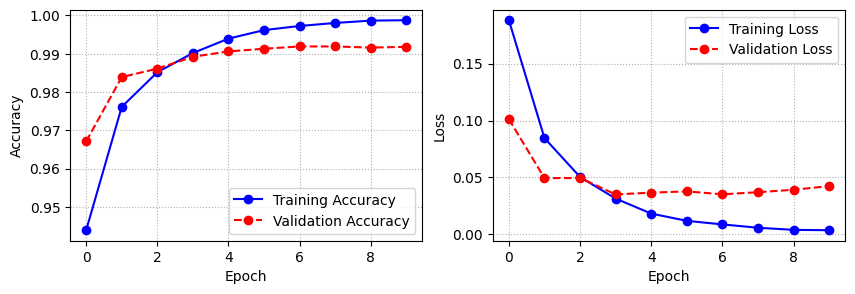

In [ ]:
plot_model_results(history_model_5)

### Batch Normalization

In [ ]:
model_6 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28, 28, 1)),

        tf.keras.layers.Conv2D(kernel_size=3, filters=12, use_bias=False, padding='same'),
        tf.keras.layers.BatchNormalization(center=True, scale=False),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Conv2D(kernel_size=6, filters=24, use_bias=False, padding='same', strides=2),
        tf.keras.layers.BatchNormalization(center=True, scale=False),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Conv2D(kernel_size=6, filters=32, use_bias=False, padding='same', strides=2),
        tf.keras.layers.BatchNormalization(center=True, scale=False),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(200, use_bias=False),
        tf.keras.layers.BatchNormalization(center=True, scale=False),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model_6.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_model_6 = model_6.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[lr_decay_callback],
    batch_size=65, verbose=2
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
924/924 - 88s - 95ms/step - accuracy: 0.9614 - loss: 0.1241 - val_accuracy: 0.9829 - val_loss: 0.0511 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
924/924 - 143s - 155ms/step - accuracy: 0.9858 - loss: 0.0458 - val_accuracy: 0.9874 - val_loss: 0.0415 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
924/924 - 155s - 168ms/step - accuracy: 0.9903 - loss: 0.0307 - val_accuracy: 0.9884 - val_loss: 0.0375 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
924/924 - 130s - 140ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9917 - val_loss: 0.0265 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
924/924 - 139s - 151ms/step - accuracy: 0.9957 - loss: 0.0134 - val

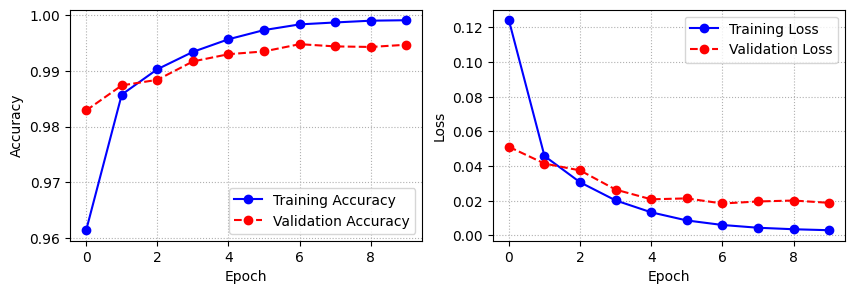

In [ ]:
plot_model_results(history_model_6)

## Ploting results

In [ ]:
models = [model_1, model_2, model_3, model_4, model_5, model_6]

#### Predictions on test data

In [ ]:
import numpy as np

result_list = []

for model in models:
  results = model.predict(x_test)
  results = np.argmax(results, axis=1)
  result_list.append(results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


#### Confusion Matrix

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix

cms_list = []

for result in result_list:
  cm = confusion_matrix(
      y_test, result, labels=np.arange(10)
  )

  cms_list.append(cm)

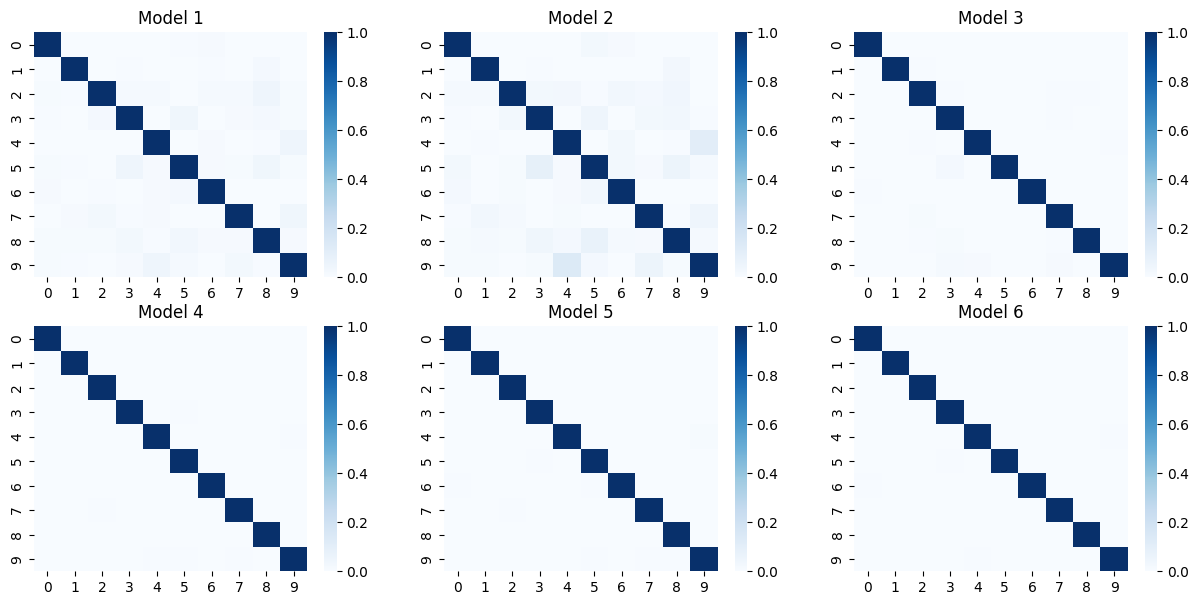

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
ax      = ax.flatten()

for i in range(6):
  cm_norm = sklearn.preprocessing.MinMaxScaler().fit_transform(cms_list[i])
  sns.heatmap(cm_norm, cmap='Blues', ax=ax[i])
  ax[i].set_title(f'Model {i + 1}')

#### Bar plot

Text(0.5, 1.0, "Model's performance")

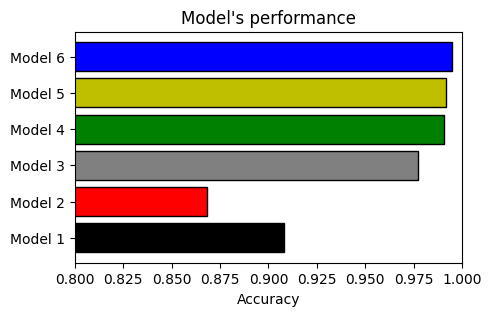

In [ ]:
from sklearn.metrics import accuracy_score

accs_list = []

fig, ax = plt.subplots(figsize=(5, 3))

for result in result_list:
  acc = accuracy_score(result, y_test)
  accs_list.append(acc)

ax.barh(range(6), width=accs_list, color=['k', 'r', 'gray', 'g', 'y', 'b'], ec='k')
ax.set_yticks([0, 1, 2, 3, 4, 5], ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'])
ax.set_xlim(0.8, 1)
ax.set_xlabel('Accuracy')
ax.set_title(f"Model's performance")

## Finding the best model with Keras Tuner

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras_tuner
from keras_tuner import RandomSearch

##### Function to Create Model

In [ ]:
def create_model(hp):
    model = keras.Sequential()
    # Camada vetorização
    model.add(layers.Flatten(input_shape=(28, 28, 1)))

    # laço para definir quantidade de camadas
    for i in range(hp.Int('num_layers', 2, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', 32, 64, 128), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, 0.05)))

    model.add(layers.Dense(units=10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

    return model

### Searching Models

In [ ]:
tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    directory='mnist'
)

tuner.search(
    x_train,
    y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test, y_test),
    callbacks=[tf.keras.callbacks.TensorBoard('mnist2', histogram_freq=1)]
)

Trial 15 Complete [00h 00m 18s]
val_accuracy: 0.942799985408783

Best val_accuracy So Far: 0.9563000202178955
Total elapsed time: 00h 04m 51s


### TensorBoard

In [ ]:
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir=mnist2

Reusing TensorBoard on port 6006 (pid 19191), started 0:00:30 ago. (Use '!kill 19191' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
<IPython.core.display.Javascript object>

SyntaxError: invalid syntax (<ipython-input-49-2957378219e4>, line 1)